### Imports

In [1]:
## General
import os
import glob

# Data Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

### Variables

In [6]:
unit = "line"
data_dir = '../data/' + unit + '/preprocessed/'
cutoff = 7

### Data

In [7]:
filenames = np.array(glob.glob(data_dir+'*.csv'))
filenames = [f for f in filenames if 'vergil' not in f]
filenames

['../data/line/preprocessed/lucan-ovid-amores.csv',
 '../data/line/preprocessed/lucan-ovid-ars_amatoria.csv',
 '../data/line/preprocessed/lucan-ovid-heroides.csv',
 '../data/line/preprocessed/lucan-ovid-medicamina.csv',
 '../data/line/preprocessed/lucan-ovid-remedia_amoris.csv',
 '../data/line/preprocessed/lucan-propertius-elegies.csv',
 '../data/line/preprocessed/lucan-tibullus-elegies.csv']

In [8]:
results = pd.DataFrame()

for file in filenames:
    df = pd.read_csv(file)
    results = results.append(df)

results = results.reset_index(drop=True)


In [9]:
# SEE http://www.swegler.com/becky/blog/2014/08/06/useful-pandas-snippets/
results['TARGET_AUTHOR'], results['TARGET_BOOK'], results['TARGET_LINE'] = zip(*results['TARGET_LOC'].apply(lambda x: x.split('.')))
results['SOURCE_AUTHOR'] = results['SOURCE_LOC'].apply(lambda x: x[:x.index('.')])
#df['A'].apply(str)

results['TARGET_BOOK'] = results['TARGET_BOOK'].apply(int)
results['TARGET_LINE'] = results['TARGET_LINE'].apply(int)


In [10]:
results = results.loc[results['SCORE'] >= 7]

## Figure 4

In [11]:
bc1 = results.loc[results['TARGET_BOOK'] == 1]
bc1 = bc1.sort_index(by=['TARGET_BOOK','TARGET_LINE'], ascending=[True,True])

line_scores = bc1.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size]})

# Numpy agg function (obv.) leaves out lines that have no results, so we need to put the zeroes back in
x = list(line_scores.index)
y = list(line_scores['TARGET_LINE']['size'])

b1_len = 695 #length of Book 1
z = []

for i in range(1,b1_len+1):
    if i in x:
        z.append((i,y[x.index(i)]))
    else:
        z.append((i,0))
        
scores = [list(t) for t in zip(*z)]

x = scores[0]
y = scores[1]

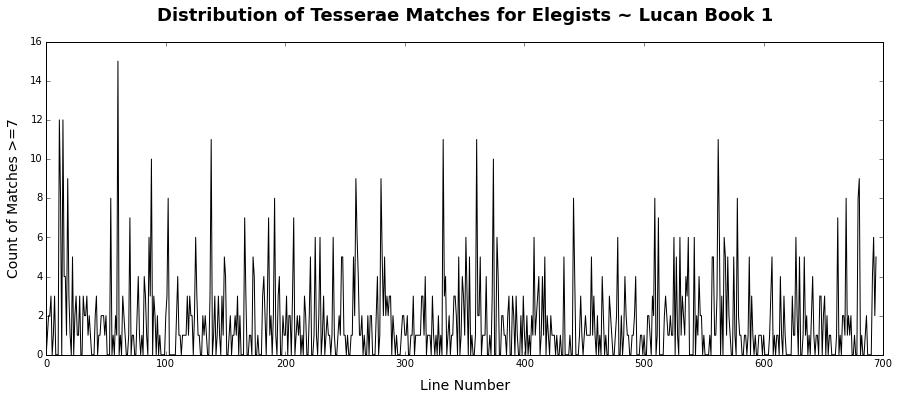

In [12]:
fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)
ax.plot(y, color="k")

t =  plt.title('Distribution of Tesserae Matches for Elegists ~ Lucan Book 1',fontsize = 18, fontweight = "bold")
t.set_y(1.05)
fig.subplots_adjust(top=0.85)

ax.xaxis.labelpad = 10 
ax.yaxis.labelpad = 10 

ax.set_xlabel('Line Number', fontsize = 14)
ax.set_ylabel('Count of Matches >=7', fontsize = 14)
plt.show()

In [13]:
def smooth_list(x,window):
    smoothed_list = []
    for i in range(0,len(x)-window):
        smoothed_list.append(sum(x[i:i+window])/window)
    return smoothed_list

In [14]:
def add_blank_scores(x,y,length):
# Numpy agg function (obv.) leaves out lines that have no results, so we need to put the zeroes back in

    z = []

    for i in range(1,length+1):
        if i in x:
            z.append((i,y[x.index(i)]))
        else:
            z.append((i,0))
        
    scores = [list(t) for t in zip(*z)]

    return scores[0],scores[1]

In [15]:
lucan_book_lengths = [695,736,762,824,816,830,872,872,1108,546]

In [16]:
def plot_allusive_density(results, book, length, window=25, height=4):
    subset = results.loc[results['TARGET_BOOK'] == book]
    subset_scores = subset.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.sum]})
    
    subset_scores_index = list(subset_scores.index)
    subset_scores_list = list(subset_scores['TARGET_LINE']['size'])
    x, y = add_blank_scores(subset_scores_index,subset_scores_list,length)
    subset_scores_list = y
    
    subset_scores_list_smoothed = smooth_list(subset_scores_list,window)

    avg = sum(subset_scores_list_smoothed)/len(subset_scores_list)
    
    
    fig = plt.figure()

    fig.set_size_inches(15,3)
    ax = fig.add_subplot(111)
    #ax.axhline(y=avg, color='lightgray')
    ax.plot(subset_scores_list_smoothed, color="black")

    xticks = np.arange(0,max(x),50)
    ax.set_xticks(xticks)

    ax.set_ylim([0, height])
    ax.set_xlim([0, 1108])

    ax.set_title('Smoothed Distribution of Tesserae Matches for Elegists ~ Lucan Book ' + str(book) + ' (Window = 25)', fontsize = 14, fontweight = 'bold')
    ax.set_xlabel('Line Number')
    ax.set_ylabel('Count of Scores >= 7')

    plt.show()

## Figure 5

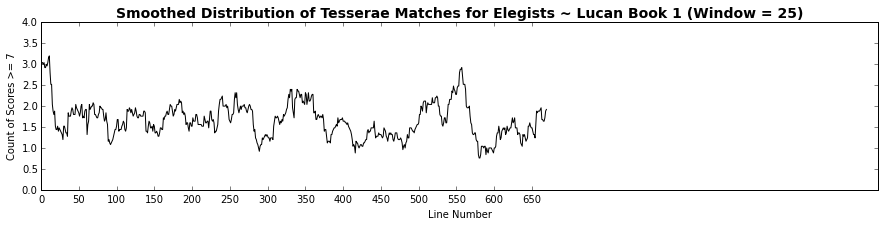

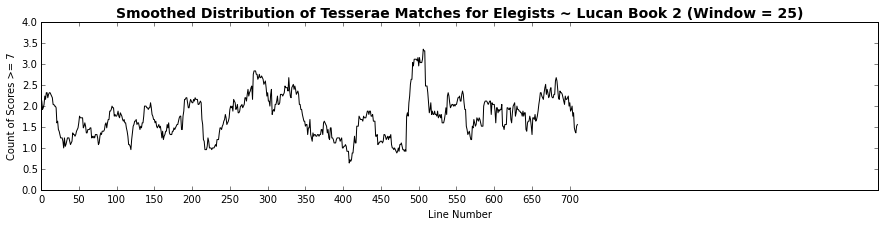

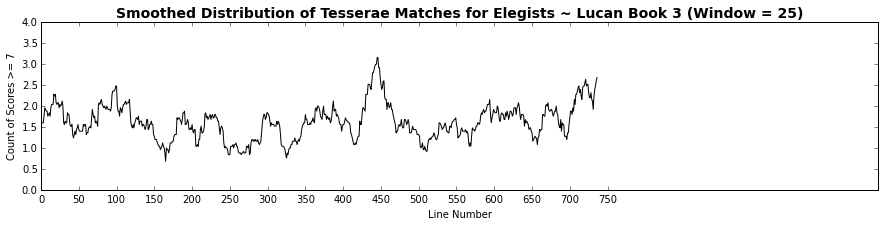

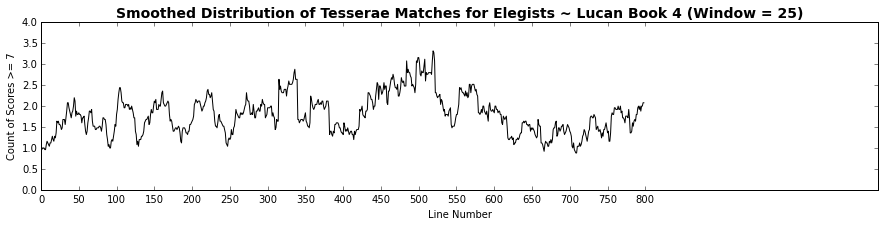

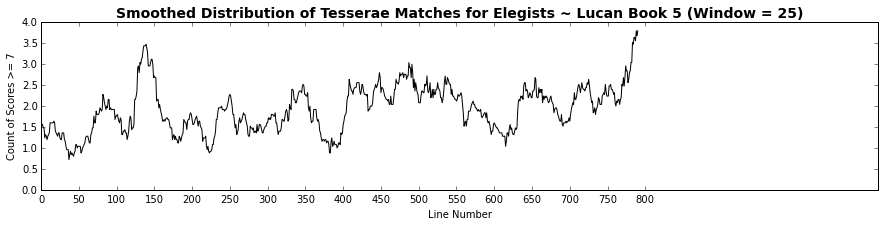

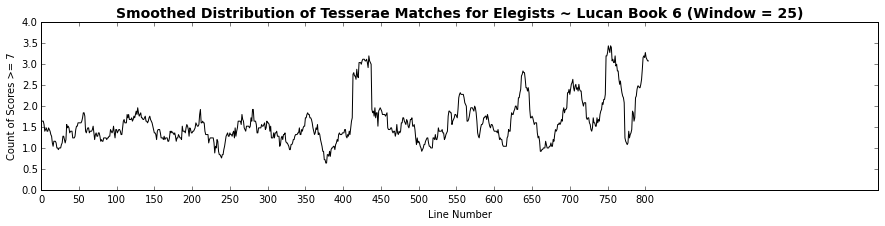

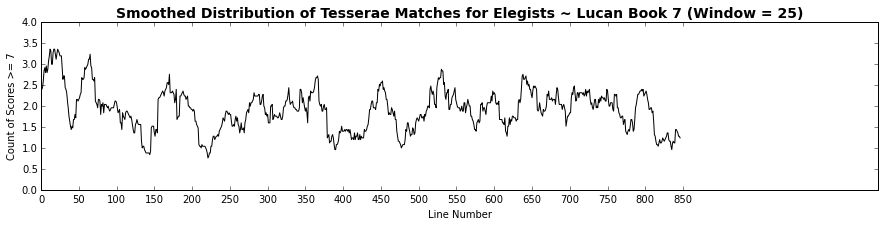

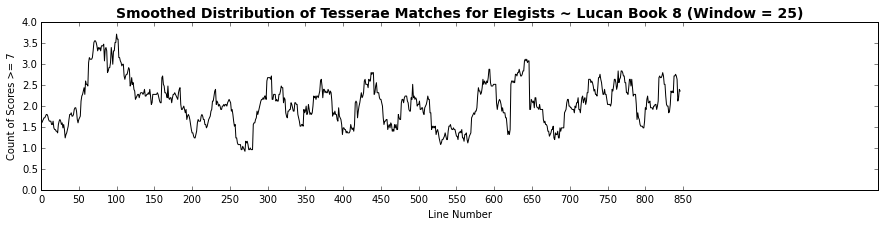

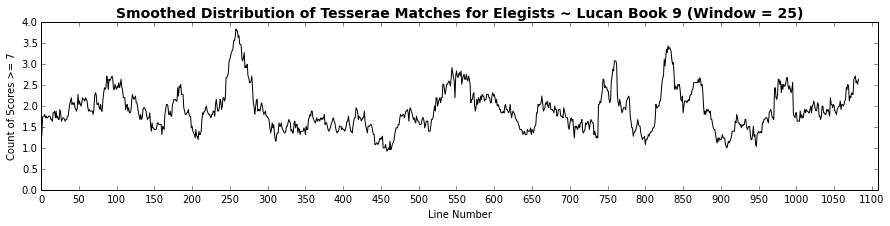

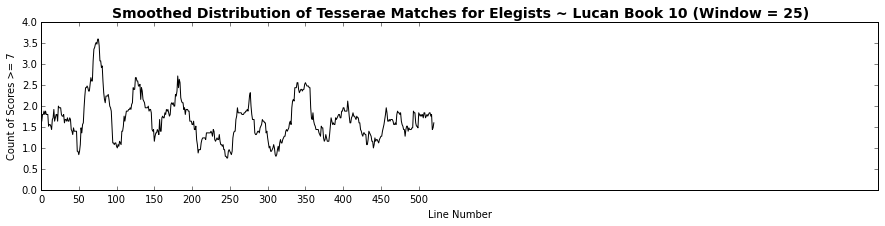

In [17]:
for i in range(1,11):
    plot_allusive_density(results, i, lucan_book_lengths[i-1],window=25, height=4)